# Lab 2: Creating Publication Quality (PQ) Output
In this lab we will will build on our previous lab in which we looked at descriptive statistics and visualizations looking specifically at how to generate or convert these tables and graphs into PQ output.  For your projects this semester all charts and graphs and tables will need to be PQ.  

- [Descriptive Statistics](#desc)
    - [Frequency Tables - Categorical Variables](#freq)
        - [One-way Table](#freq)
        - [Two-way Table](#twoway)
    - [Summary Statistics - Numerical Variables](#numsum)
- [Vizualizations - ggplot2](#viz)

In [63]:
#load packages
library(tidyverse) # includes ggplot2
library(magrittr) # so I can use the assignment pipe  %<>% 
library(ggpubr) # containes line/dot plot for visualizing means

#install.packages("flextable") 
library(flextable) ## generates PQ frequency/summary tables in .doc or picture format

library(desc)
## installations required to save flextables and ggplot2 objects as imgs
#install.packages("webshot")
#webshot::install_phantomjs()


In this lab I'm going to again use polling data collected by the creators of the card came Cards Against Humanity - https://thepulseofthenation.com/#the-poll.  There are a mix of serious and silly questions. This particular poll is from September 2017.

See Lab 2 for data cleaning steps.  I've saved that cleaned df as an .rds file that I'm going to directly load here.

In [67]:
#load data
cah_poll <- readRDS('cahpoll9.rds')

#inspect df to make sure it's loaded correctly
glimpse(cah_poll)
head(cah_poll)

Observations: 998
Variables: 21
$ income       <dbl> 8000, 68000, 46000, 51000, 100000, 54000, 83000, 11400...
$ gender       <fct> Female, Female, Male, Male, Female, Female, Male, Fema...
$ age          <dbl> 64, 56, 63, 48, 32, 64, 61, 64, 64, 68, 63, 44, 57, 62...
$ age_cat      <fct> 55-64, 55-64, 55-64, 45-54, 25-34, 55-64, 55-64, 55-64...
$ polaffil     <fct> Democrat, Democrat, Independent, Republican, Democrat,...
$ apptrump     <fct> Strongly disapprove, Strongly disapprove, Somewhat App...
$ educ         <fct> College degree, High school, Some college, High school...
$ race         <fct> White, Black, White, White, White, White, White, White...
$ marital      <fct> Divorced, Single, Married, Divorced, Married, Married,...
$ robots       <fct> Unlikely, Unlikely, Unlikely, Unlikely, Unlikely, DK/R...
$ climate      <fct> Real and Caused by People, DK/REF, Real but not Caused...
$ transformers <dbl> 1, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 1, 0, 0, 1, 1, 5, 1, ...
$ sci_good     <fct>

income,gender,age,age_cat,polaffil,apptrump,educ,race,marital,robots,...,transformers,sci_good,vaccines,books,ghosts,fedbudget,fedfundsci,earthsun,smartdumb,urinate
<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,...,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>
8000,Female,64,55-64,Democrat,Strongly disapprove,College degree,White,Divorced,Unlikely,...,1,Strongly Agree,Somewhat Disagree,20,Yes,10,Too Low,FALSE,Smart and Sad,Unacceptable
68000,Female,56,55-64,Democrat,Strongly disapprove,High school,Black,Single,Unlikely,...,0,Somewhat Agree,Somewhat Disagree,6,No,90,Too High,FALSE,Smart and Sad,Unacceptable
46000,Male,63,55-64,Independent,Somewhat Approve,Some college,White,Married,Unlikely,...,0,Somewhat Agree,Strongly Agree,0,No,20,About Right,TRUE,Dumb and happy,Acceptable
51000,Male,48,45-54,Republican,Strongly Approve,High school,White,Divorced,Unlikely,...,0,Somewhat Disagree,Somewhat Disagree,1,No,10,About Right,FALSE,Dumb and happy,Unacceptable
100000,Female,32,25-34,Democrat,Somewhat Approve,Some college,White,Married,Unlikely,...,1,Strongly Agree,Strongly Agree,30,Yes,10,Too Low,FALSE,Smart and Sad,Acceptable
54000,Female,64,55-64,Democrat,Strongly disapprove,Some college,White,Married,DK/REF,...,0,Strongly Agree,Strongly Agree,15,No,1,Too Low,TRUE,Smart and Sad,Unacceptable


In [ ]:
#IQR - interquartile range
IQR(cah_poll$income) ## the IQR of income is zero because 25th and 75th percentile are identical
print("---------------")
IQR(cah_poll$books)

<a id="desc"></a>
## Descriptive Statistics 
We'll look at ways to create PQ tables to display basic descriptive statistics of our variables.

We'll look at frequency tables for categorical variables (both one-way and two-way).  Two-way frequency tables are often call cross tabs or contingency tables.

For numerical variables we'll cover PQ tables that list summary statistics (mean, median, quartiles, min, max, etc.) for your numerical variable(s) of interest.

<a id="freq"></a>
### Categorical Variables - Frequency Tables
We'll start with a one-way basic frequency table.  There are a number of ways we can create this, using count() or table() is most common.

#### One-way Frequency Table
A one-way table lists the frequencies (counts) of observations for each level of one categorical/factor variable.  We'll create a frequency table of the variable sci_good using group_by() and summarize() from dplyr.  A good PQ table will include both frequencies and percentages.

In [8]:
# create table and print to screen to inspect
#using syntax:
# dfname  %>% group_by(variablename) %>% 
#             summarize(Frequency = n(),
#                       Percentage = n() / dim(df)[1]) ## dim(df)[1] is the overall number of rows in your df

cah_poll %>% group_by(sci_good) %>% 
             summarize(Frequency = n(), ## Note that I'm making my summary vars PQ quality names because these will be the column headings
                       Percentage = n() / dim(cah_poll)[1])

sci_good,Frequency,Percentage
<fct>,<int>,<dbl>
DK/REF,60,0.06012024
Neither Agree nor Disagree,19,0.01903808
Somewhat Agree,335,0.33567134
Somewhat Disagree,133,0.13326653
Strongly Agree,349,0.34969940
Strongly Disagree,102,0.10220441


This looks like it is generating the right output (the counts of observations in each category of sci_good) but to make it PQ I need to reorder my factor levels so that they are in an appropriate order.  In this case I want the values in order for the range of Somewhat Agree to Somewhat Disagree.  If I want to keep DK/REF as a level I need to relabel it with a PQ descriptive name and include it at the end of the table.  

Note that your levels must have descriptive names in order to be PQ.  For example, the label "nhwhite" for a race variable would not be PQ, it should be listed as "White, non-hispanic." (this is a real race category from US gov't surveys, FYI)

I'm going to do the re-labeling of the DK/REF level, the re-ordering of the factors, create the final freq table and save it as an object.  I'm also going to convert the numerical proportions in the Percentage column to strings that represent the percentages formatted with % and rounding to one decimal place.

Note, creating the table in this way creates a df object.  Do not overwrite your df containing your individual observations with your frequency table, save it with a different object name.

In [34]:
## note - I'm not making these adjustments to the underlying dataset, I'm only making them as I'm building the table
## I'm doing this all in one statement/pipe but I'm putting comments between lines

sci_good_table <- #save the resulting table object
    cah_poll %>% # start with the df with the observations
# relabel DK/REF - we have to use fct_ functions within mutate because we're editing one variable inside a df
    mutate(sci_good = fct_recode(sci_good, "Don't Know or Refused" = "DK/REF")) %>% 
# reorder factor levels - again I need to do this inside mutate
    mutate(sci_good = fct_relevel(sci_good, "Strongly Agree", "Somewhat Agree", "Neither Agree nor Disagree", 
                                             "Somewhat Disagree", "Strongly Disagree"))  %>% 
# create table
    group_by(sci_good) %>% 
    summarize(Frequency = n(), ## Note that I'm making my summary vars PQ quality names because these will be the column headings
              Percentage = n() / dim(cah_poll)[1])  %>% 
# format percentages - now I'm using mutate on the df that resulted from the summarize statement.  
# This needs to be done after creating the table but still in the same pipe.  We're passing forward a df in it's current state
# in the create table step we're creating a different df from our df of observations and that is now the df passed forward
    mutate(Percentage = paste0(format(Percentage * 100, digits = 2), "%")) # multplying by 100 and keeping one decimal place / 2 sig digits
    # paste0 is used to add % to the end of the number

#inspect resulting table / df
sci_good_table

sci_good,Frequency,Percentage
<fct>,<int>,<chr>
Strongly Agree,349,35.0%
Somewhat Agree,335,33.6%
Neither Agree nor Disagree,19,1.9%
Somewhat Disagree,133,13.3%
Strongly Disagree,102,10.2%
Don't Know or Refused,60,6.0%


Now that we have the information in a table format we want, we can proceed to "prettify" our table for output to a paper.

We'll use the package `flextable` for this.

In [30]:
flextable(sci_good_table)

a flextable object.
col_keys: `sci_good`, `Frequency`, `Percentage` 
header has 1 row(s) 
body has 6 row(s) 
original dataset sample: 
                    sci_good Frequency Percentage
1             Strongly Agree       349      35.0%
2             Somewhat Agree       335      33.6%
3 Neither Agree nor Disagree        19       1.9%
4          Somewhat Disagree       133      13.3%
5          Strongly Disagree       102      10.2%

First, a note, if you run this code in RStudio in an .rmd you will get a preview of the formatted table in the "Viewer" pane.  This doesn't occur within this framework, we're instead seeing the underlying structure of the "flextable" object.

This, just passing our df to the flextable() function creates the most basic flextable with default options.  When I ran this code in RStudio I ended up with something that needs a bit of customization:

<img src="pqimages/flex1.jpeg" height = '50'>

The first and most important thing I need to do has nothing to do with the table formatting - I need to relabel the first column "sci_good" with a descriptive name.  I'm going to do this in the df before creating the flex table

In [37]:
# using vector index [1] to access only the first column name of the df sci_good_table
colnames(sci_good_table)[1] <- "Response"

I get: 
![](pqimages/ft2.png)
Now I need to autofit the table to the contents to make the table more attractive and readable

In [38]:
## create flextable object and save it as base_table
base_table <- flextable(sci_good_table)

# use autofit() on the base_table object
autofit(base_table)

a flextable object.
col_keys: `Response`, `Frequency`, `Percentage` 
header has 1 row(s) 
body has 6 row(s) 
original dataset sample: 
                    Response Frequency Percentage
1             Strongly Agree       349      35.0%
2             Somewhat Agree       335      33.6%
3 Neither Agree nor Disagree        19       1.9%
4          Somewhat Disagree       133      13.3%
5          Strongly Disagree       102      10.2%

We now have a good basic structure. 
![](pqimages/ft3.png)

Time to add a title.

In [39]:
base_table <- flextable(sci_good_table)

bt2 <- autofit(base_table)
add_header_lines(bt2, "Table 1: Scientists are honest and serving public good")

a flextable object.
col_keys: `Response`, `Frequency`, `Percentage` 
header has 2 row(s) 
body has 6 row(s) 
original dataset sample: 
                    Response Frequency Percentage
1             Strongly Agree       349      35.0%
2             Somewhat Agree       335      33.6%
3 Neither Agree nor Disagree        19       1.9%
4          Somewhat Disagree       133      13.3%
5          Strongly Disagree       102      10.2%

We're getting close to a PQ table.  I also want to alter the justification for the columns of values.

This is current state:
![](pqimages/ft4.png)


In [40]:
# create base_table
base_table <- flextable(sci_good_table)
# autofit and save as bt2
bt2 <- autofit(base_table)
# add title, save as bt3
bt3 <- add_header_lines(bt2, "Table 1: Scientists are honest and serving public good")
# align numerical columns, save as bt4
# align can equal "center" "left" or "right"
# part = "all" to do the action on the entire table
# j = 2:3 indicates I only want to align the 2nd and 3rd columns. 
bt4 <- align(bt3, align = "center", part = "all", j = 2:3)
bt4

a flextable object.
col_keys: `Response`, `Frequency`, `Percentage` 
header has 2 row(s) 
body has 6 row(s) 
original dataset sample: 
                    Response Frequency Percentage
1             Strongly Agree       349      35.0%
2             Somewhat Agree       335      33.6%
3 Neither Agree nor Disagree        19       1.9%
4          Somewhat Disagree       133      13.3%
5          Strongly Disagree       102      10.2%

Rendered in RStudio this looks like:
![](pqimages/ft5.png)

I now need to save this object in a way that I can include it in my paper.  I can do this either as a picture file or in .doc (Microsoft Word) format

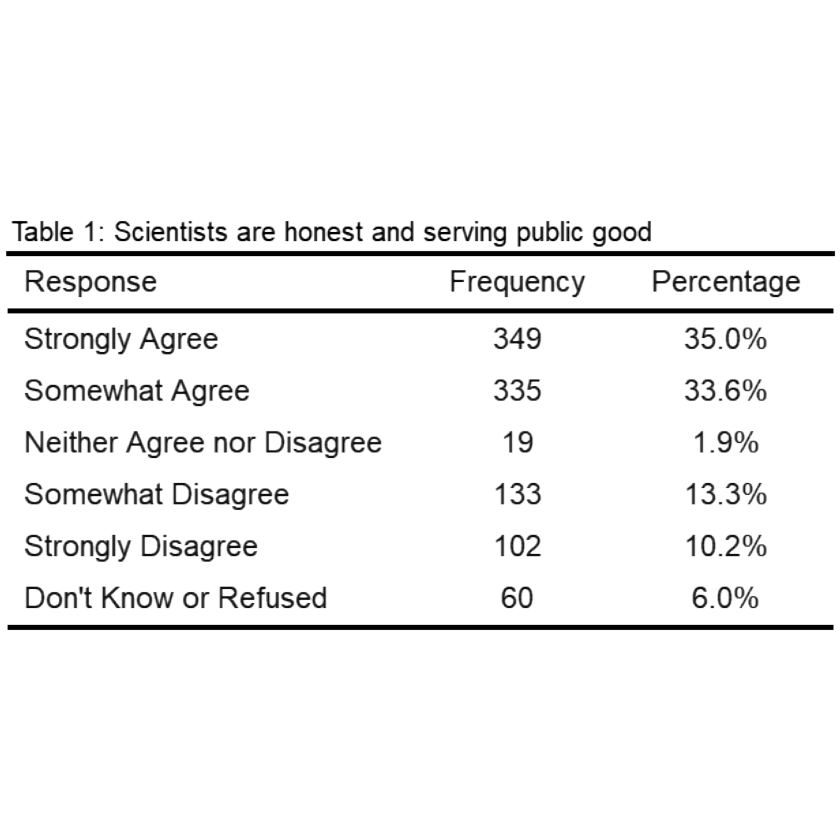

In [43]:
## plot is a way to render the image as an internal R image object - 
## this will not save it to your computer as an image
## this is how the plot will appear when saved.  As you can see it's slightly better than the RStudio preview
plot(bt4)

To save a flexable as an img you need to install `phantomjs` and `webshot`.  To save as a .doc file you need to install 

In [47]:
## SAVE AS IMG FILE

save_as_image(bt4, path = "sci_good_table.png") ## need an img extension, .png

[1] "C:/Users/Adrianne/Documents/GitHub/INST314_spring2020/sci_good_table.png"

I can print this table here in the markdown block to show you the saved image (which will need to be sized to fit appropriately in your document):

![](sci_good_table.png)


In [48]:
## SAVE AS .DOCX
save_as_docx(bt4, path = "sci_good_tab.docx")

Running that code won't output anyting in RStudio, but you should now have a docx file by the name you selected in `path = ` in your working directory.  Remember if you don't know what your working directory is (where you are in the file structure of your computer) you can run `getwd()`

<a id = "twoway"></a>
#### Two-way Frequency Table
I'll quickly show you how to make a crosstab / contingency table / two-way table.  

In [61]:
## adjust factor labels
cp2 <- cah_poll %>% ## create new clean version for this table
    mutate(sci_good = fct_recode(sci_good, "Don't Know or Refused" = "DK/REF")) %>% 
    mutate(vaccines = fct_recode(vaccines, "Don't Know or Refused" = "DK/REF")) %>% 
    mutate(sci_good = fct_relevel(sci_good, "Strongly Agree", "Somewhat Agree", "Neither Agree nor Disagree", 
                                             "Somewhat Disagree", "Strongly Disagree"))  %>% 
    mutate(vaccines = fct_relevel(vaccines, "Strongly Agree", "Somewhat Agree", "Neither Agree nor Disagree", 
                                             "Somewhat Disagree", "Strongly Disagree"))

## create frequency table with totals in the margins
freqtab <- as.data.frame.matrix(addmargins(table(cp2$sci_good, cp2$vaccines))) 
freqtab 

## create percentage table with totals in margins
proptab <- as.data.frame.matrix(addmargins(prop.table(cp2$sci_good, cp2$vaccines))) 
proptab 


,Strongly Agree,Somewhat Agree,Neither Agree nor Disagree,Somewhat Disagree,Strongly Disagree,Don't Know or Refused,Sum
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Strongly Agree,270,44,3,14,11,7,349
Somewhat Agree,206,87,3,23,11,5,335
Neither Agree nor Disagree,7,4,6,1,0,1,19
Somewhat Disagree,56,31,2,21,18,5,133
Strongly Disagree,41,21,1,13,18,8,102
Don't Know or Refused,22,11,1,3,2,21,60
Sum,602,198,16,75,60,47,998


Warning message in Ops.factor(MARGIN):
"'-' not meaningful for factors"


ERROR: Error in margin.table(x, margin): 'x' is not an array


The sci_good variable was the first variable entered in to the function, therefore is the row variable (labels on left).  The second variable entered, vaccines, is the variable across the columns (labels at top).

In [ ]:
## as.data.frame.matrix() let's us make the table a data.frame
as.data.frame.matrix(table(cah_poll$sci_good, cah_poll$vaccines)) 

### Grouped Statistics
Often we want to look at numerical descriptive statistics (mean, median) but within groups of a categorical variable.  We saw an example of this on the first homework.

In [ ]:
# lets look at a summary of age by whether the R thinks it's ok to urinate in the shower
cah_poll  %>% 
    mutate(urinate = fct_infreq(urinate)) %>% ## ordering factor by frequency for this table
    group_by(urinate)  %>% 
    summarize(freq = n(),
              mean_age = mean(age), 
              med_age = median(age),
              stddev_age = sd(age))

<a id="viz"></a>
## Visualizations
Now we'll move onto making charts and graphs with ggplot2.  In this notebook I'll use one example plot and build it up from basic to fully customized item by item.  These customizations will work on any ggplot2 objects, including the ones created from ggpubr (the grouped mean plot).

For this example I'm going to look at the distribution of the R's estimate of federal budget spent on scientific research by political party.


In [68]:
# edit factor levels of politcal party
cah_poll %<>% #save changes overwriting cah_poll
    mutate(polaffil = fct_recode(polaffil, "Don't Know or Refused" = "DK/REF")) %>% 
    mutate(polaffil = fct_relevel(polaffil, "Democrat", "Independent", "Republican"))

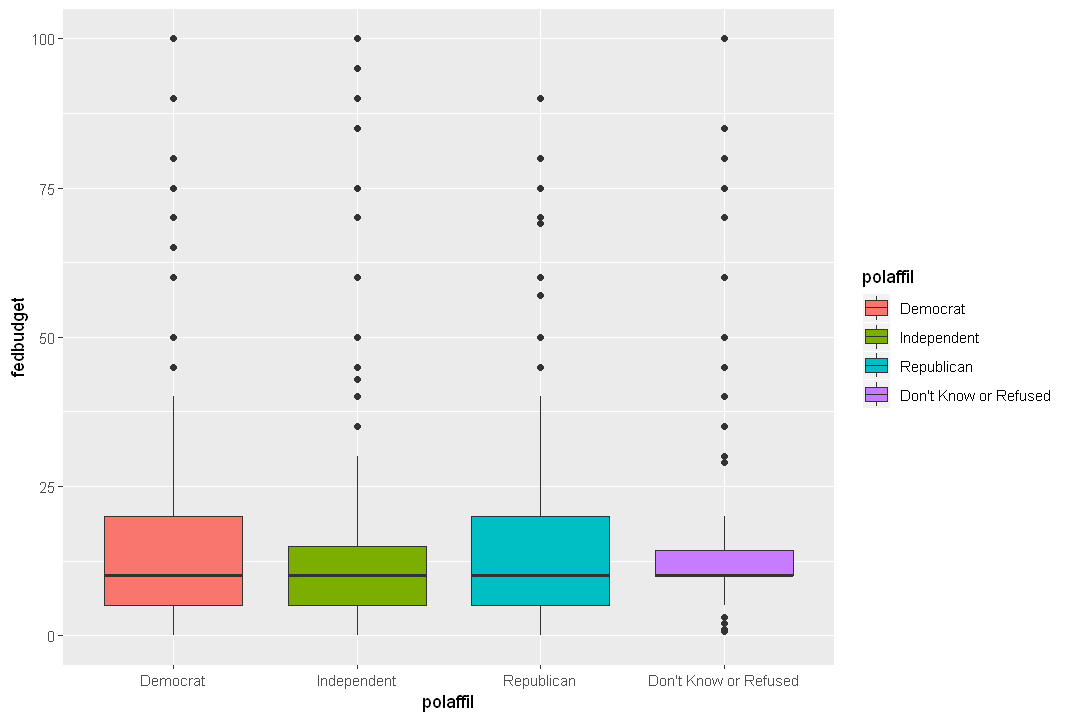

In [77]:
options(repr.plot.width=9, repr.plot.height=6) ## plot size options for Jupyter notebook ONLY

#create base ggplot - grouped boxplot
## note that I can save this base plot as a ggplot object. I'm going to call mine bp (for base plot)
## I can then take that base plot and add other options to it without restating all of the plot setup
bp <- cah_poll %>% ggplot(aes(x = polaffil, y = fedbudget, fill = polaffil)) +
                geom_boxplot()

bp ## print plot - when you save the plot it doesn't print to screen

That is the most basic plot laying out our variables and the type of plot we want (the geom or geometry).  Now we'll add a customization that is vital to PQ format, custom descriptive labels and titles.

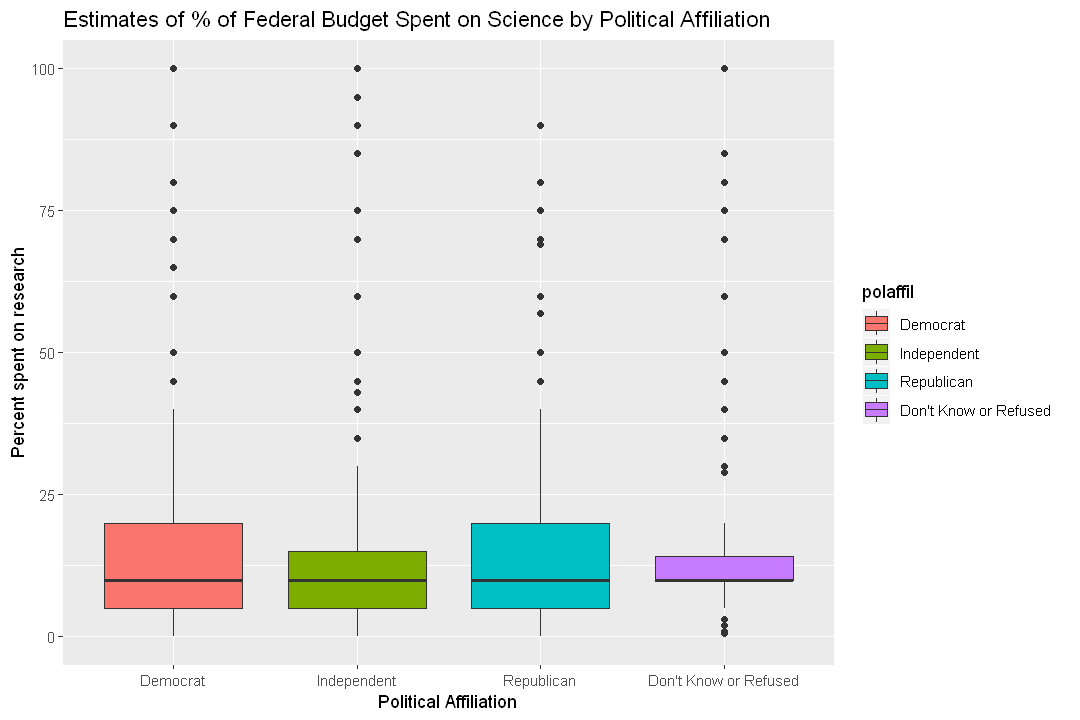

In [79]:
bp2 <- bp + # start with saved base plot and add labels, save as bp2
    labs(x = "Political Affiliation", y = "Percent spent on research", 
         title = "Estimates of % of Federal Budget Spent on Science by Political Affiliation")

bp2

Now we have descriptive labels on everything but the Legend for the key of the different colors.  Because those colored bars are labeled on the x-axis we can suppress the legend from printing.  I'll start with bp2, the base ggplot + labels we just added, remove the legend and save it as bp3.

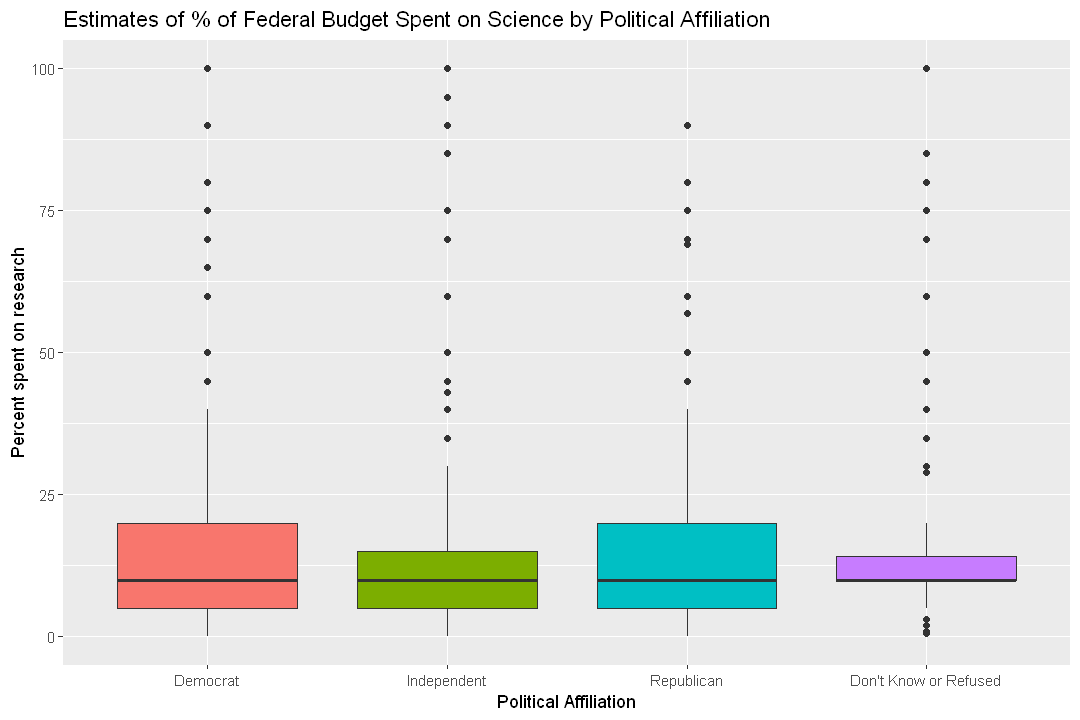

In [81]:
bp3 <- bp2 +
    theme(legend.position = "none") ## legend position = none removes legend.  It's part of the theme() setup of the plot
bp3

This would satisfy PQ at the lowest possible acceptable level, but there is so much more we could do.  In the next cells I'm going to progressively add additional customizations.

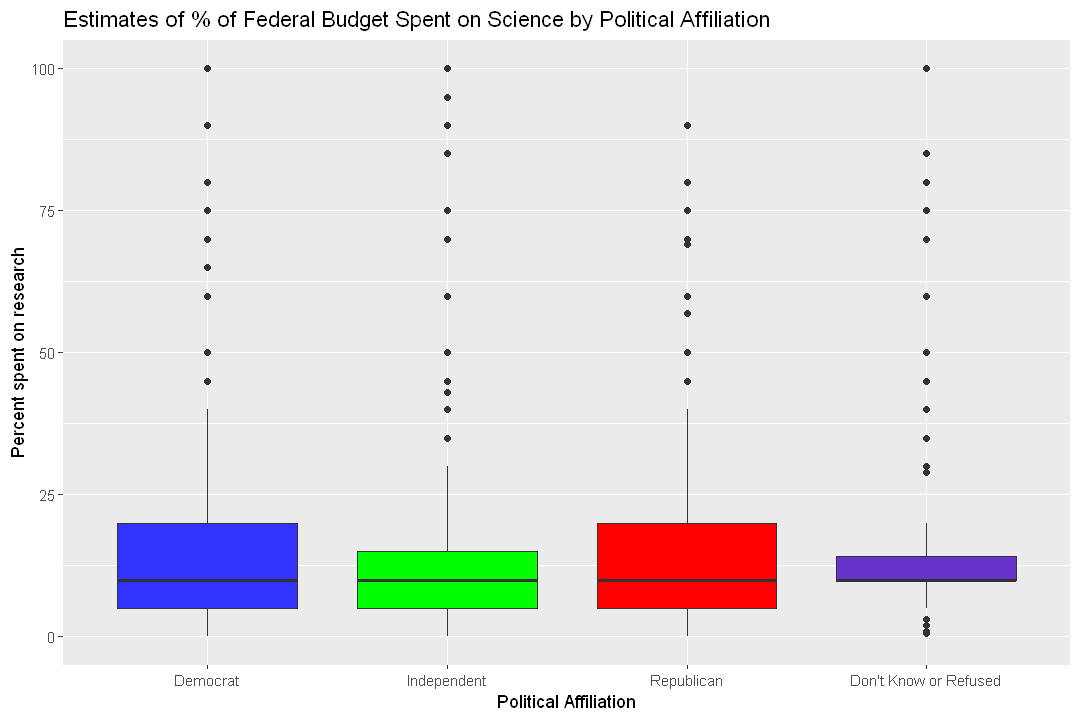

In [87]:
## custom colors for box fills.

bp4 <- bp3 +
    scale_fill_manual(values=c("#3333FF", "#00FF00", "#FF0000", "#6633CC")) #hex color codes

# use scale_fill_manual when using fill in aes() use scale_color_manual when using color() in aes()

bp4

## YOUR TURN!
Create one graph (of any type shown here) to visualize variable(s) in the cah_poll dataset that we have not yet looked at.  You can run glimpse() to remind you what variables are included in the df.  Look up use a customization to ggplot we haven't discussed here.